<img src='https://i.ibb.co/Lpy4XvR/data-warehouse.jpg' width=70% left>

<font color='darkblue'> <div style="text-align: center">


#  *API - European Central Bank (ECB)*

<font>
<br><br>


The ECB SDMX 2.1 RESTful web service offers programmatic access to the statistical data and metadata disseminated via the ECB Statistical Data Warehouse. https://sdw-wsrest.ecb.europa.eu/help/

 Official Website https://sdw.ecb.europa.eu/

In [318]:
HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script>Para mostrar u ocultar el código haz click <a href="javascript:code_toggle()">aquí</a>.''')
HTML('''<script>code_show=true; function code_toggle() {if (code_show){ $('div.input').hide(); } else {$('div.input').show();}
code_show = !code_show} $( document ).ready(code_toggle);</script>Para mostrar u ocultar el código haz click  <a href="javascript:code_toggle()">aquí</a>.''') 

<br><br><font color="darkblue"> <div style="text-align: center">

## Libraries

In [320]:
from IPython.display import HTML
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<br><br><font color="darkblue"> <div style="text-align: center">

# Bank interest rates

## *Loans to households for consumption with a floating rate and an IRF period of up to one year (new business) - euro area*

*Bank interest rate statistics consist of data on interest rates that resident monetary financial institutions (MFIs) except central banks and money market funds apply to the euro-denominated deposits of, and loans to, households and non-financial corporations resident in the euro area, as well as data on the volumes involved. These harmonised statistics are used to analyse monetary developments and the monetary transmission mechanism, and to monitor financial stability.*

*Frequency: Monthly*

*Reference area: Euro area*


In [347]:
url = 'https://sdw-wsrest.ecb.europa.eu/service/data/'
headers  = {'Accept':'application/json'}
key_bank_interest_rate = 'MIR/M.DE+ES+FR+PT+IT+GR+BE+DE+GB+IE.B.A2B.F.R.A.2250.EUR.N'

json = requests.get(f'{url}{key_bank_interest_rate}', headers =headers ).json()
text = requests.get('{}{}'.format(url, key_bank_interest_rate), headers=headers).text
#print(text)

In [348]:
time_period = json['structure']['dimensions']['observation'][0]['values'] #counter


dates = {k : v['id'] # id = month
    for k,v in enumerate(time_period)}


reference_area = [i['name'] # name = country
                  for i in json['structure']['dimensions']['series'][1]['values']] 

df = pd.DataFrame()

for i, area in enumerate(reference_area):
    list = json['dataSets'][0]['series'][f'0:{i}:0:0:0:0:0:0:0:0']['observations'] # value
    df[area] = pd.Series(
        {dates[int(i)]: v[0] 
         for i, v in list.items() })

   
df.tail()

,Belgium,Germany,Spain,France,Greece,Ireland,Italy,Portugal
2019-10,3.08,9.23,3.80,5.12,10.29,8.72,3.88,4.99
2019-11,3.58,8.54,2.57,5.38,10.69,8.66,3.75,5.06
2019-12,3.03,8.59,2.92,4.59,10.94,9.15,3.76,4.75
2020-01,3.61,8.94,3.77,3.85,11.18,8.69,3.65,4.98
2020-02,3.18,8.15,3.30,4.64,10.65,8.30,3.46,4.67


<br><br><font color="darkblue"> <div style="text-align: center">
## Distribution - Bank interest rates

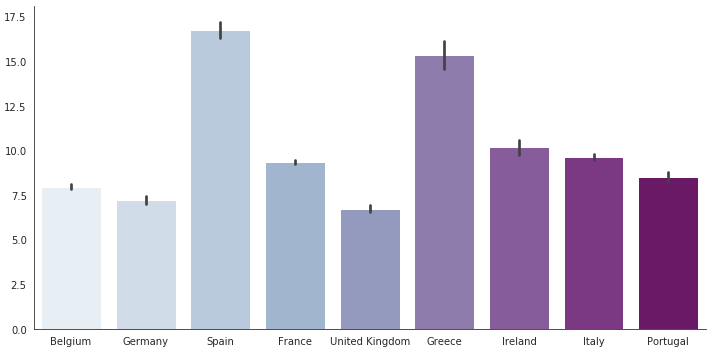

In [346]:
with sns.axes_style('white'):
    g = sns.catplot( data=df, aspect=2, kind="bar", palette= "BuPu")
    g.set_xticklabels(step=1)

<br><br><font color="darkblue"> <div style="text-align: center">
## Evolution Spain - Bank interest rates

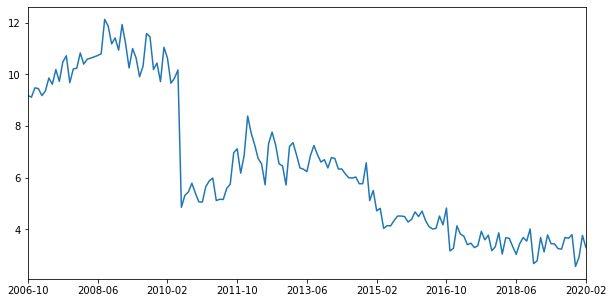

In [327]:
df['Spain'].plot(figsize = (10,5))

In [328]:
df.agg(['max', 'min'])

,Belgium,Germany,Spain,France,Greece,Ireland,Italy,Portugal
max,7.64,9.68,12.13,8.79,11.33,10.39,11.21,8.79
min,2.17,3.30,2.57,3.78,6.34,3.65,3.23,4.67


<font color='darkblue'><div style="text-align: center">

# *Population*

*Unit: Millions of Persons*

*Frequency: Annual*

*ECB Last update	2019-08-28 16:03:25.0*

*Eurostat's first demographic estimates based on preliminary monthly data and national forecasts*
<font>
<br><br>

In [349]:
url = 'https://sdw-wsrest.ecb.europa.eu/service/data/'
headers  = {'Accept':'application/json'} 
key_population = 'ENA/A.N.DE+ES+FR+PT+IT+GR+BE+DE+GB+IE.W0.S1.S1._Z.POP._Z._Z._Z.PS._Z.N'
json = requests.get(f'{url}{key_population}', headers =headers ).json()
text = requests.get('{}{}'.format(url, key_population), headers=headers).text
#print(text)

In [350]:
time_period = json['structure']['dimensions']['observation'][0]['values'] 
dates = {k : v['id'] for k,v in enumerate(time_period)} 
reference_area = [i['name'] for i in json['structure']['dimensions']['series'][2]['values']] 

df = pd.DataFrame()

for k, v in enumerate(reference_area):
    list = json['dataSets'][0]['series'][f'0:0:{i}:0:0:0:0:0:0:0:0:0:0:0']['observations'] 
    df[v] = pd.Series(
        {dates[int(k)]: v[0] 
        for k, v in list.items()})

df.tail()

,Belgium,Germany,Spain,France,United Kingdom,Greece,Ireland,Italy,Portugal
2015,60730.6,60730.6,60730.6,60730.6,60730.6,60730.6,60730.6,60730.6,60730.6
2016,60627.5,60627.5,60627.5,60627.5,60627.5,60627.5,60627.5,60627.5,60627.5
2017,60536.7,60536.7,60536.7,60536.7,60536.7,60536.7,60536.7,60536.7,60536.7
2018,60458.7,60458.7,60458.7,60458.7,60458.7,60458.7,60458.7,60458.7,60458.7
2019,60375.2,60375.2,60375.2,60375.2,60375.2,60375.2,60375.2,60375.2,60375.2


<br><br><font color="darkblue"> <div style="text-align: center">
## Evolution Spain - Population

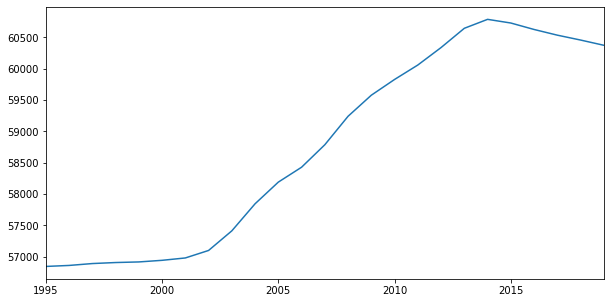

In [351]:
df['Spain'].plot(figsize = (10,5))

<font color='darkblue'> <div style="text-align: center">

# *Unemployment Rate*

*Unemployment rates published by the European Commission (Eurostat) and conform to International Labour Organisation (ILO) guidelines. They refer to persons actively seeking work as a share of the labour force, using harmonised criteria and definitions.*

*Frequency:	Monthly*

*Reference area: AMECO*

*Unemployment rate (as a % of labour force)*
<font>
<br><br>

In [353]:
url = 'https://sdw-wsrest.ecb.europa.eu/service/data/'
headers  = {'Accept':'application/json'}
key_unemployment_rate = 'STS/M.DE+ES+FR+PT+IT+GR+BE+DE+GB+IE.S.UNEH.RTT000.4.000'

json = requests.get(f'{url}{key_unemployment_rate}', headers =headers ).json()
text = requests.get('{}{}'.format(url, key_unemployment_rate), headers=headers).text
#print(text)

In [354]:
time_period = json['structure']['dimensions']['observation'][0]['values'] #counter


dates = {k : v['id'] # id = month
    for k,v in enumerate(time_period)}


reference_area = [i['name'] # name = country
                  for i in json['structure']['dimensions']['series'][1]['values']] 

df = pd.DataFrame()

for i, area in enumerate(reference_area):
    list = json['dataSets'][0]['series'][f'0:{i}:0:0:0:0:0']['observations'] # value
    df[area] = pd.Series(
        {dates[int(i)]: v[0] 
         for i, v in list.items() })

   
df.tail()

,Belgium,Germany,Spain,France,United Kingdom,Greece,Ireland,Italy,Portugal
2019-10,5.24,3.15,13.97,8.27,3.71,16.73,4.70,9.70,6.48
2019-11,5.22,3.18,13.82,8.20,3.65,16.65,4.67,9.70,6.67
2019-12,5.24,3.19,13.71,8.17,3.75,16.41,4.73,9.76,6.70
2020-01,5.18,3.19,13.66,8.16,3.83,16.40,4.79,9.81,6.72
2020-02,5.18,3.17,13.57,8.08,NaN,NaN,4.79,9.75,6.49


<br><br><font color="darkblue"> <div style="text-align: center">
## Distribution - Unemployment Rate

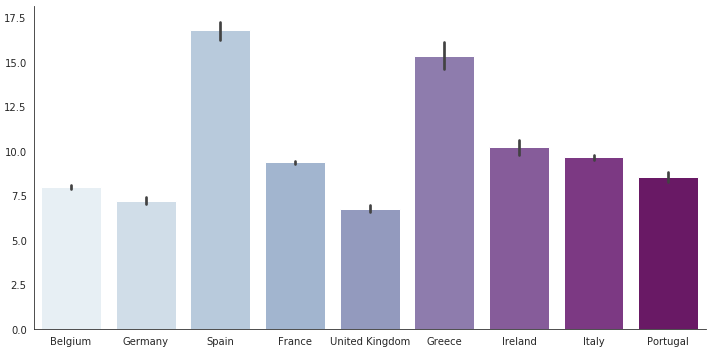

In [355]:
with sns.axes_style('white'):
    g = sns.catplot( data=df, aspect=2, kind="bar", palette= "BuPu")
    g.set_xticklabels(step=1)

<br><br><font color="darkblue"> <div style="text-align: center">
## Evolution Spain - Unemployment Rate

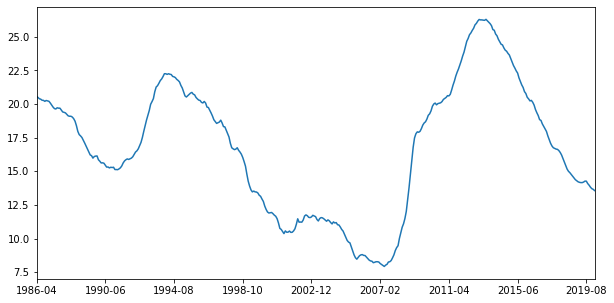

In [356]:
df['Spain'].plot(figsize = (10,5))

In [344]:
df.agg(['max', 'min'])

,Belgium,Germany,Spain,France,United Kingdom,Greece,Ireland,Italy,Portugal
max,10.12,11.24,26.29,10.96,11.34,27.89,16.90,13.05,17.43
min,5.18,3.10,7.93,7.24,3.65,7.35,3.93,5.82,4.75
